In [1]:
import numpy as np
import matplotlib
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
%matplotlib inline

In [2]:
data=pd.read_csv('Boston.csv')
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
#Each record in the database describes a Boston suburb or town. 
#The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970.
#The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): 
#CRIM: per capita crime rate by town
#ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
#INDUS: proportion of non-retail business acres per town
#CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#NOX: nitric oxides concentration (parts per 10 million)
#RM average number of rooms per dwelling
#AGE proportion of owner-occupied units built prior to 1940
#DIS weighted distances to five Boston employment centres
#RAD index of accessibility to radial highways
#TAX full-value property-tax rate per $10,000
#PTRATIO pupil-teacher ratio by town
#Black 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
#LSTAT % lower status of the population
#MEDV Median value of owner-occupied homes in $1000’s

In [4]:
data.shape

(506, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [6]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

In [7]:
X = data[['rm']]
Y = data['medv']
#Fit the linear model using highway-mpg
lm.fit(X,Y)# training data is passed to fit method

LinearRegression()

In [8]:
Yhat=lm.predict(X)
Yhat[0:5]

array([25.17574577, 23.77402099, 30.72803225, 29.02593787, 30.38215211])

In [10]:
from sklearn.metrics import r2_score
r2_score(Y,Yhat)

0.48352545599133423

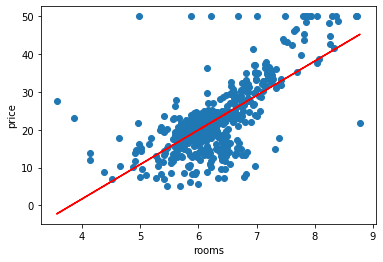

In [11]:
# plot regression model for rooms vs price in boston
plt.scatter(data['rm'],Y)# X,Y
plt.plot(data['rm'],Yhat,color='red')
plt.xlabel('rooms')
plt.ylabel('price')
plt.show()

In [12]:
print(lm.intercept_)
print(lm.coef_)

-34.670620776438554
[9.10210898]


In [13]:
lm1 = LinearRegression()
X = data[['crim']]
Y = data['medv']
lm1.fit(X,Y)

LinearRegression()

In [14]:
Yhat=lm1.predict(X)
Yhat[0:5]

array([24.03048217, 24.02176733, 24.02177563, 24.01966646, 24.00443729])

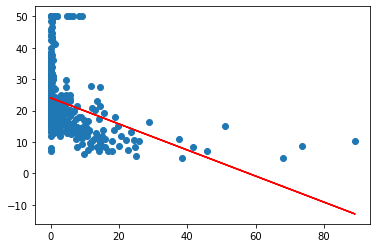

In [15]:
# plot regression model for crime rate per capita vs price of house
plt.scatter(data['crim'],Y)
plt.plot(data['crim'],Yhat,color='red')
plt.show()

In [16]:
print(lm1.intercept_)
print(lm1.coef_)

24.03310617412388
[-0.41519028]


In [17]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [21]:
r2_score(Y,Yhat)

0.15078046904975717

In [19]:

from sklearn.metrics import mean_squared_error
print('mean_sqrd_error is==',mean_squared_error(Y,Yhat))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(Y,Yhat)))


mean_sqrd_error is== 71.69073588196659
root_mean_squared error of is== 8.467038200100824


In [25]:
x = data['rm']
y = data['medv']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)
m = 1 # these could be random
c = 0 # these could be random
alpha = 0.01

count = 100

def derivate_m(y_train, predictions, x_train):
  n = len(x_train)
  e = sum(x_train*(y_train - predictions))
  return -2/n*e 

def derivate_c(y_train, predictions, x_train):
  n = len(x_train)
  return (-2/n)*(sum(y_train-predictions))

for i in range(count):
  predictions = m*x_train + c

  m = m - alpha*(derivate_m(y_train, predictions, x_train))
  c = c - alpha*(derivate_c(y_train, predictions, x_train))


# training is done
print('slope:', m)
print('intercept:', c)

# testing

predictions = m*x_test + c
score=r2_score(y_test,predictions)

print('r2 score: ', score)



slope: 3.783922809132761
intercept: -0.4554661000205098
r2 score:  0.2833766454445663


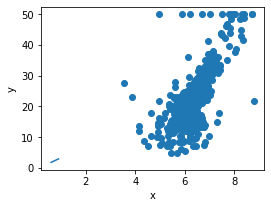

In [26]:
x1 = 0.6
x2 = 0.9
y1 = m*x1 + c
y2 = m*x2 +c

plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x,y)
ax.plot([x1, x2], [y1, y2])

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

In [28]:
from sklearn.linear_model import Lasso, Ridge

x = data.drop('medv',axis=1)
y = data['medv']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train)
predictions = model_lasso.predict(x_test)
print('r2 for lasso',r2_score(y_test, predictions))




model_ridge = Ridge(alpha=0.01)
model_ridge.fit(x_train, y_train)
predictions = model_ridge.predict(x_test)
print('r2 for ridge',r2_score(y_test, predictions))

r2 for lasso 0.7050266660540582
r2 for ridge 0.708165833744475
